<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

<p><a name="contents"></a></p>

# Contenido Sesión 5: Análisis exploratorio:

- <a href="#intro">1. Introducción</a><br>
- <a href="#eStat">2. Estadística descriptiva.</a><br>
    - <a href="#des_count">2.1. Métodos <code>.describe()</code> y <code>count_values()</code>.</a><br>
    - <a href="#bPlot">2.2. Box Plots.</a><br>
    - <a href="#sPlot">2.3. Scatter Plots.</a><br>
    - <a href="#hmaps">2.1. Groupby y Heatmaps.</a><br>
- <a href=#corr> 3. Correlación
- <a href="#anova"> 4. Análisis de varianzas (ANOVA).  
  - <a href="#modelado">4.1. ANOVA para creación de modelos.</a><br>
  - <a href="#Reducción dimensional">4.2. ANOVA para la reducción dimensional.</a><br>

<p><a name="intro"></a></p>

## Introducción:

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable blanco.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en lo que se busca establecer.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas que abordaremos en el presente notebook:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento: Método GroupBy()</li>  
  <li> Correlación de Pearson</li>
  <li> Mapas de correlación</li>
  <li> Análisis de variaciones: Anova</li>
</ol>

En primer lugar, carguemos el dataset de caractarísticas de carros que vamos a analizar.

In [3]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [4]:
#Apariencia de la tabla de datos
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

<p><a name="eStat"></a></p>

## Estadística descriptiva:

[[Contenidos]](#contents)

Antes de ponernos en la tarea de construir un modelo que pretenda predecir alguna característica del conjunto de datos, es importante realizar una exploración de los datos. La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

<ol>
  <li>Métodos: <code>.describe()</code>, el cual permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

<p><a name="des_count"></a></p>

### 2.1 Metodos .describe() y .value_counts()

In [7]:
# Para dar una descripción estadística de variables numéricas:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Por ejemplo, la variable "drive-wheels" describe la tracción de los vehiculos consignados en la tabla; son variables categóricas que representan:

<ol>
    <li>fwd - Front Wheel Drive: Tracción delantera.</li>
    <li>rwd - Rear Wheel Drive: Tracción Tracera.</li>
    <li>4wd - 4 Wheel Drive: Tracción de cuatro ruedas.</li>
</ol>

Para contabilizar esta variable usamos el método <code>.value_counts()</code>

In [8]:
# Para contabilizar variables categóricas:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

<Axes: ylabel='drive-wheels'>

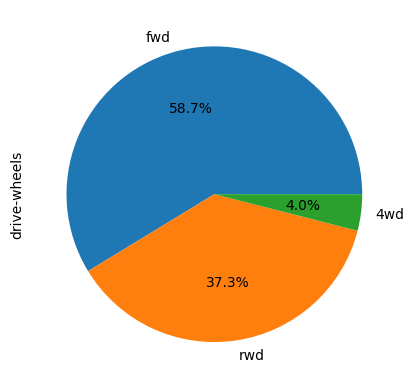

In [9]:
df["drive-wheels"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

<b>Ejercicio</b>: Guarde el número de cuentas por tipo de tracción en un nuevo DataFrame, renombre la columna a "value_counts" y establezca el nombre de los índices como "drive-wheels".

De doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
#Definición del dataFrame
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
# Renombramiento de la columna a value_counts
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
#Renimbramiento de los índices
drive_wheels_counts.index.name='drive_wheels'
#Visualización del dataFrame:
drive_wheels_counts
--->

No obstante, esta función también permite contabilizar las variables numéricas. Por ejemplo, "width" representa el ancho de los carros:

<p><a name="bPlot"></a></p>

### 2.2 Box Plots

[Contenidos](#contents) 

Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

<ol>
    <li> La distribución de los datos.</li>
    <li> Asimetría.</li>
    <li> Los puntos aislados.</li>
</ol>

En la siguiente gráfica se muestran las diferentes partes de una gráfica de caja:

<img src="https://imgbb.com/"><img src="https://i.ibb.co/6tkRtg0/Captura-de-pantalla-2019-08-22-19-01-17.png" style="width:250px;height:300px;" alt="Captura-de-pantalla-2019-08-20-22-39-39" border="0"></a>

En esta gráfica, podemos identificar las siguiente cantidades:

<ol>
    <li> Mediana.</li><br>
    <li> Cuartil superior $P_{75}.$</li><br>
    <li> Cuartil inferior $P_{25}$</li><br>
    <li>Rango intercuartil $IQR=P_{75}-P_{25}$</li><br>
    <li>Extremo superior \[UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}\]<br> </li><br>
    <li>Extremo inferior \[LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}\]<br></li>
</ol>

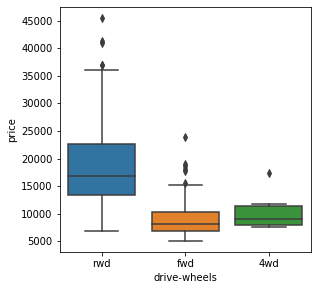

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4.5, 4.5))
sns.boxplot(x="drive-wheels",y="price", data=df)

In [ ]:
sns.boxplot?

En este caso se tiene que:

<ol>
    <li> Mediana: rwd $\rightarrow$ 16900, fwd $\rightarrow$ 8192 y 4wd$\rightarrow$9005.5</li><br>
    <li> Cuartil superior: $P_{75\text{-rwd}}\approx 22547.50$, $P_{75\text{-fwd}}\approx 10333$ y $P_{75\text{-4wd}}\approx 11368$</li><br>
    <li> Cuartil inferior: $P_{25\text{-rwd}}= 13455$, $P_{25\text{-fwd}}\approx 6951$ y $P_{25\text{-4wd}}\approx 7984$</li><br>
    <li>Rango intercuartil: $IQR_{\text{rwd}}\approx 9023$, $IQR_{\text{fwd}}\approx 3381$ y $IQR_{\text{4wd}}\approx 3384$</li><br>
    <li>Extremo superior \[UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}\]<br>
        Por ejemplo, $UE_{\text{rwd}}= P_{\text{75}\text{rwd}}+1.5\times IQR_{\text{rwd}}\rightarrow UE_{\text{rwd}}=22547.50+(22547.50-13455.00)\times1.5 \therefore UE_{\text{rwd}}=36186.25$, ya que $UE_{\text{rwd}}<\text{max(Data)}$. </li><br>
    <li>Extremo inferior \[LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}\]<br>
    Por ejemplo, $LE_{\text{rwd}}=\text{min(Data)}\rightarrow LE_{\text{rwd}}=6785$, ya que se cumple que $LO\leq \text{min(Data)}$. </li><br>
</ol>

In [ ]:
df.groupby(["drive-wheels"])['price'].median()

drive-wheels
4wd     9005.5
fwd     8192.0
rwd    16900.0
Name: price, dtype: float64

In [ ]:
Q75=df.groupby(["drive-wheels"]).price.quantile(0.75)
Q75

drive-wheels
4wd    11367.75
fwd    10332.50
rwd    22547.50
Name: price, dtype: float64

In [ ]:
Q25 = df.groupby(["drive-wheels"]).price.quantile(0.25)
Q25

drive-wheels
4wd     7984.25
fwd     6950.75
rwd    13455.00
Name: price, dtype: float64

In [ ]:
Q50 = df.groupby(["drive-wheels"]).price.quantile(0.5)
Q50

drive-wheels
4wd     9005.5
fwd     8192.0
rwd    16900.0
Name: price, dtype: float64

In [ ]:
iqr=Q75-Q25
iqr

drive-wheels
4wd    3383.50
fwd    3381.75
rwd    9092.50
Name: price, dtype: float64

In [ ]:
Q25 - 1.5*iqr

drive-wheels
4wd    2909.000
fwd    1878.125
rwd    -183.750
Name: price, dtype: float64

Los box plots, o diagramas de cajas permiten comparar facilmente diferentes grupos. En este ejemplo, mediante el uso de diagramas de cajas podemos ver diferentes categorías y sus distribuciones respecto al precio. 

Vemos que, por ejemplo, que el precio de los carros de tracción trasera (rwd) son distintos a los de otras categorias, no obstante, el precio de los carros de tracción delantera y $4\times4$ son casi indistinguibles.

**Ejercicio:** Use un diagrama de cajas para determinar si la variable "body-style" y "engine-location", la cual determina el tipo de carro, es un buen predictor del precio. Argumente su respuesta.

De click **aquí** para ver la respuesta.

<!--- Respuesta:
#Celda 1:
sns.boxplot(x="body-style", y="price", data=df)
# Argumentación: Se puede observar que el precio de los carros para los diferentes tipos de carros presenta una superposición significativa, de tal forma que la variable "body-style" no sería un predictor adecuado del precio
#Celda 2:
sns.boxplot(x="engine-location", y="price", data=df)
# Argumentación: Puede observarse qu la distribución de los precios entre las subcategorias fron y rear son lo suficiente diferentes como para considerar la variable categórica "engine-location" como un predictor adecuado del precio.
--->

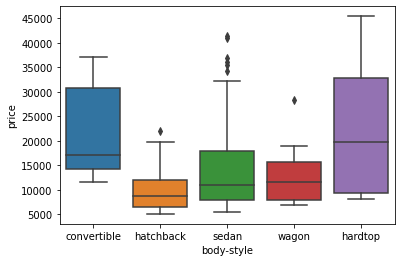

In [ ]:
sns.boxplot(x="body-style",y="price", data=df)

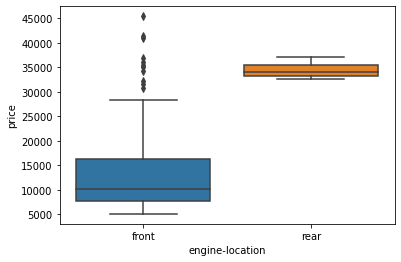

In [ ]:
sns.boxplot(x="engine-location",y="price", data=df)

<p><a name="sPlot"></a></p>

### 2.3 Scatter plots

[Contenidos](#contents) 

Dentro de nuestros datos podemos tener en varias ocaciones variables continuas. Este tipo de datos representan puntos dentro de un rango. En el conjunto de datos que estamos trabajando, por ejemplo, las variables correspondientes a las columnas **"price"** y **"engine-size"** son variables continuas. ¿Qué deberiamos hacer si queremos predecir el precio a partir del tamaño del motor?.

Una forma rápida para inspeccionar este tipo de relaciones consiste en realizar un scatter plot de ambas variables. Cada observación en el scatter plot es representada  como un punto. Este tipo de gráficas representa la relación ente ambas variables. La variable predictora representa la variable que se usa para predecir un determinado resultado. Por otra parte, la variable diana o blanco, corresponde a la variable que se pretende predecir. En nuestro caso tenemos que:

<ol>
    <li>Variable diana o blanco: "price".</li>
    <li>Variable predictora: "engine-size".</li>
</ol>

En una gráfica de dispersión, usualmente el eje x, o eje horizontal, se hace coincidir con la variable predictora y el eje y, o eje vertical, con la variable diana.

Veamos ahora como se relacionan las variables "price" y "engine-size".

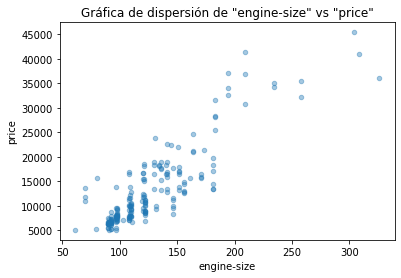

In [ ]:
df.plot(kind="scatter", y = "price", x = "engine-size", title = "Gráfica de dispersión de \"engine-size\" vs \"price\"",alpha=0.4)

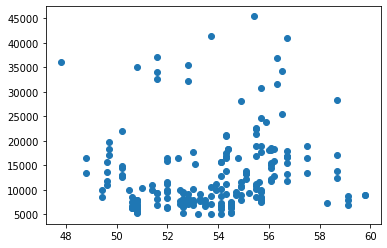

In [ ]:
plt.scatter(df['height'],df['price'])

<p><a name="hmaps"></a></p>

### 2.4 Groupby y Heatmaps

[Contenidos](#contents)

Recordemos que con el método groupby podemos agrupar los datos en diferentes categorías. Los datos son agrupados con base en una o varias características y el análisis se realiza sobre los grupos individuales. Veamos esto.

Agrupemos, por ejemplo la tabla por tipo de tracción ("drive-wheels"). Podemos observar que tenemos tres tipos de categorias.

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Definamos un subdataFrame con las columnas 'drive-wheels', 'body-style' y 'price' y agrupemos por 'drive-wheels' para calcular el valor medio en cada categoria:

In [ ]:
df_group = df[['drive-wheels','body-style','price']]

# Agrupamiento de los resultados
df_grupo1 = df_group.groupby('drive-wheels', as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
df_grupo1

,drive-wheels,price
0,rwd,19757.613333
1,4wd,10241.000000
2,fwd,9244.779661


In [ ]:
df_group.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


De los datos, se puede ver que los carros con tracción tracera son, en promedio, los mas caros. Por otra parte, los carros de tracción delantera y tracción total son, en promedio, similares. 

Podemos agrupar de acuerdo a varias variables. Por ejemplo, agrupemos por 'drive-wheels' y 'body-style'. Este procedimento agrupara el dataframe por combinaciones unicas de 'drive-wheels' y 'body-style'. Guardemos el resultado en la variable de prueba 'grupo_test'

In [ ]:
# grouping results
grupo_test = df_group.groupby(['drive-wheels','body-style'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo_test

,drive-wheels,body-style,price
0,rwd,hardtop,24202.714286
1,rwd,convertible,23949.600000
2,rwd,sedan,21711.833333
3,rwd,wagon,16994.222222
4,rwd,hatchback,14337.777778
5,4wd,sedan,12647.333333
6,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
8,fwd,sedan,9811.800000
9,4wd,wagon,9095.750000


Este tipo de tablas es más facil visualizarlas cuando se convierten en una tabla pivote. Como en Excel, en las tablas pivote podemos visualizar los datos especificando una variable categórica a lo largo de las columnas y otra variable categórica a lo largo de las filas.

En este caso, la categoria "drive-wheel" le asignaremos las filas de la tabla, y realizacemos un pivote en "body-style" para convertirla en las columnas de la tabla:

In [ ]:
grouped_pivot = grupo_test.pivot(index = 'drive-wheels', columns = 'body-style', aggfunc=np.sum)
grouped_pivot

In [ ]:
grupo_test.pivot?

En muchas ocaciones, tenemos valores nulos para algunas celdas de la tabla. Podemos rellenar estos casos con un valor 0.

---



In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [ ]:
grouped_pivot.shape[1]

5

El uso de heatmaps nos permite visualizar el comportamiento del precio en función de dos variables. Por ejemplo, pordemos visualizar la tabla pivote anterior como una imagen de píxeles con el color correspondiente al valor del precio. De esta forma, podemos ver, por ejemplo, como se relaciona el precio con el tipo de tracción y el tipo de carro:

In [ ]:
grouped_pivot.columns.levels[1]

Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style')

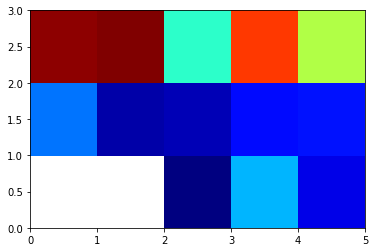

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='jet')

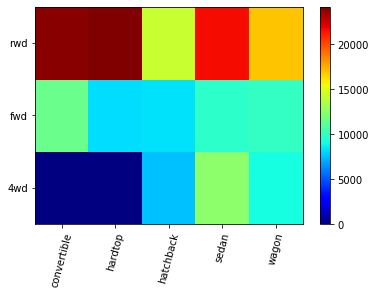

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='jet')

#labels
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate the labels
plt.xticks(rotation=75)

fig.colorbar(im)
plt.show()

In [ ]:
row_labels

Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style')

In [ ]:
col_labels

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

In [ ]:
ax.set_xticklabels?

In [ ]:
ax.pcolor?

<p><a name="corr"></a></p>

## 3. Correlación

[Contenidos](#contents)

La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4ecc0690>,
       dtype=object),)

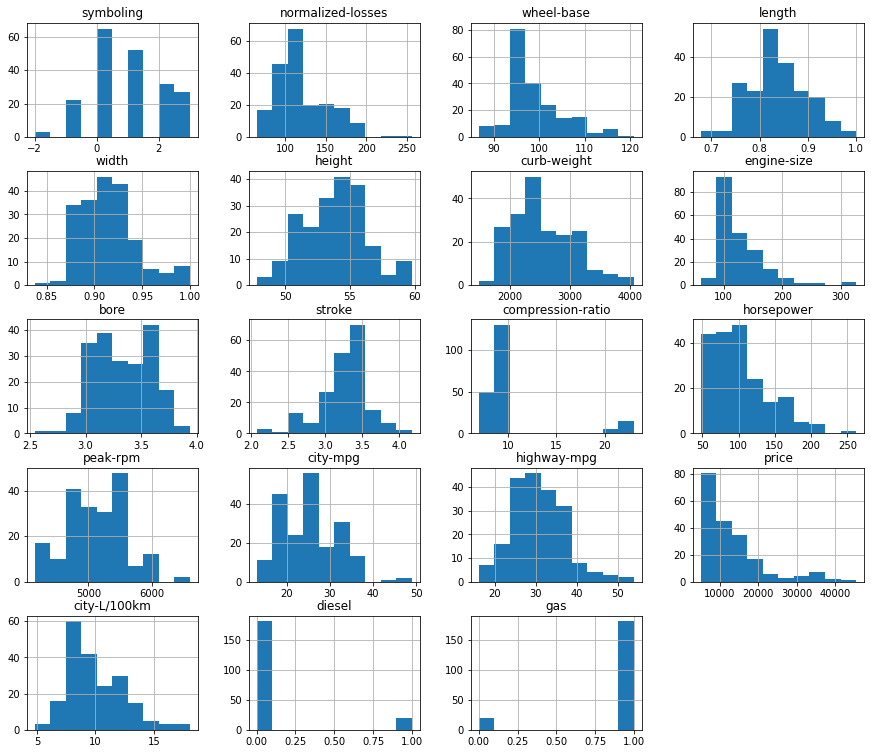

In [ ]:
df.hist(figsize=(15,13)),


En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo `scipy.stats`. Evaluemos las suposiciones para las variables "price" y "engine-size"

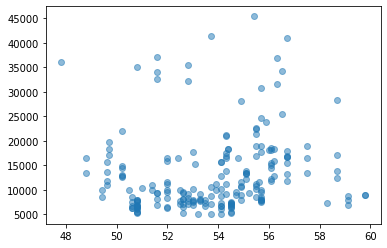

In [ ]:
plt.scatter(df['height'],df['price'],alpha=0.5)

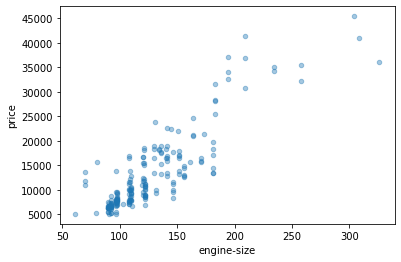

In [ ]:
# test linearity
df.plot(kind="scatter", y = "price", x = "engine-size", alpha = 0.4)

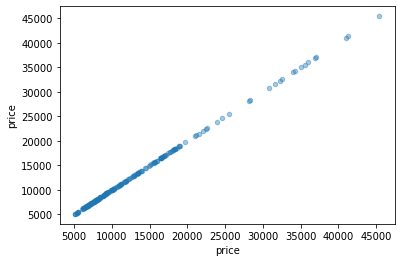

In [ ]:
df.plot(kind="scatter", y = "price", x = "price", alpha = 0.4)

Observamos que sí hay una relación lineal entre las variables. Sin embargo, los tests de uniformidad de la distribución y homogeneidad arrojan resultados negativos. Por lo tanto, la prueba de correlación apropiada para usar sería una prueba no paramétrica como la correlación de Spearman o de Kendall.

Para calcular el coeficiente de correlación podemos utilizar el método `corr()` de Pandas

In [ ]:
corr_p = df.corr()
corr_k = df.corr(method = "kendall")
corr_s = df.corr(method = "spearman")

corr_p

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Veamos cómo se correlaciona el atributo precio con los demás atributos

In [ ]:
corr_p["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [ ]:
corr_s["price"].sort_values(ascending=False)

price                1.000000
curb-weight          0.913767
horsepower           0.849142
city-L/100km         0.831284
engine-size          0.828417
width                0.812097
length               0.810331
wheel-base           0.681790
bore                 0.645943
height               0.263806
normalized-losses    0.202034
diesel               0.144657
stroke               0.117582
peak-rpm            -0.081912
symboling           -0.142683
gas                 -0.144657
compression-ratio   -0.177579
highway-mpg         -0.827265
city-mpg            -0.831284
Name: price, dtype: float64

Vemos que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; no así de su altura (heigth) o del tipo de combustible que utiliza. El atributo más prometedor para predecir el precio del vehículo es el tamaño del motor (Pearson) y el peso del motor (kendall).

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían $29^2=841$ gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el precio:

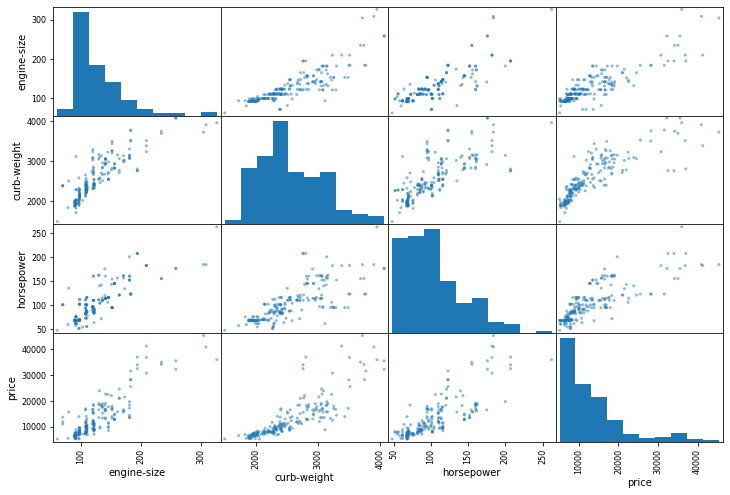

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["engine-size","curb-weight","horsepower","price"]

scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

In [ ]:
sns.pairplot?

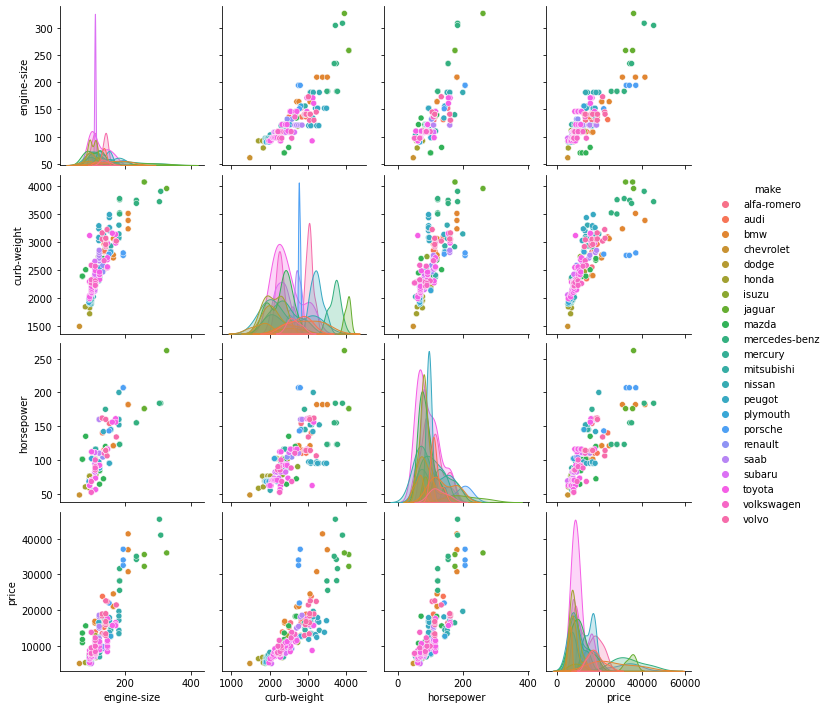

In [ ]:
sns.pairplot(df, hue = "make", vars = ["engine-size","curb-weight","horsepower","price"])

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [ ]:
df_new = df[['engine-size','curb-weight','height','width','length','horsepower','peak-rpm','price','stroke','compression-ratio']]
corr_new = df_new.corr()
corr_new

,engine-size,curb-weight,height,width,length,horsepower,peak-rpm,price,stroke,compression-ratio
engine-size,1.000000,0.849072,0.074694,0.729436,0.685025,0.822676,-0.256733,0.872335,0.209523,0.028889
curb-weight,0.849072,1.000000,0.307581,0.866201,0.880665,0.757976,-0.279361,0.834415,0.167562,0.156433
height,0.074694,0.307581,1.000000,0.306002,0.492063,-0.087027,-0.309974,0.135486,-0.062704,0.259737
width,0.729436,0.866201,0.306002,1.000000,0.857170,0.615077,-0.245800,0.751265,0.188829,0.189867
length,0.685025,0.880665,0.492063,0.857170,1.000000,0.579821,-0.285970,0.690628,0.124139,0.159733
horsepower,0.822676,0.757976,-0.087027,0.615077,0.579821,1.000000,0.107885,0.809575,0.098462,-0.214514
peak-rpm,-0.256733,-0.279361,-0.309974,-0.245800,-0.285970,0.107885,1.000000,-0.101616,-0.065713,-0.435780
price,0.872335,0.834415,0.135486,0.751265,0.690628,0.809575,-0.101616,1.000000,0.082310,0.071107
stroke,0.209523,0.167562,-0.062704,0.188829,0.124139,0.098462,-0.065713,0.082310,1.000000,0.187923
compression-ratio,0.028889,0.156433,0.259737,0.189867,0.159733,-0.214514,-0.435780,0.071107,0.187923,1.000000


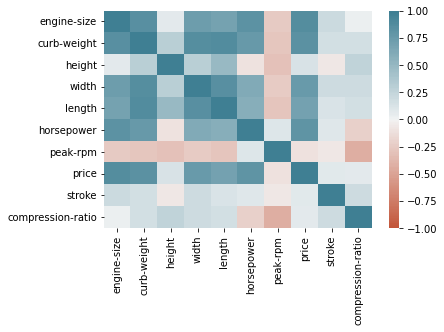

In [ ]:
df_new = df[['engine-size','curb-weight','height','width','length','horsepower','peak-rpm','price','stroke','compression-ratio']]
corr_new = df_new.corr()

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90
    
);

In [ ]:
ax.set_xticklabels?

In [ ]:
sns.heatmap?

<p><a name="anova"></a></p>

## 4. Análisis de varianza (ANOVA)

El análisis de varianza es un método estadístico que se usa para probar si existe diferencias significativas entre las medias de dos o mas grupos. ANOVA arroja como resultados dos parámetros:

<ol>
    <li>F-test score: En ANOVA se asume que todos los valores medios de los diferentes grupos son el mismo, se calcula que tanto se desvia de este supuesto y se reporta por medio del puntaje F-test. Entre más grande sea este valor, mayor diferencia existirá entre los valores medios.</li>
    <li>P-Value: Este valor nos indica que tanta significancia estadística tienen nuestro puntaje.</li>
</ol>

Si la variable precio que estamos analizando esta fuertemente correlacionada con una variable, esperamos que ANOVA nos devuelva un puntaje razonable del F-test y un valor pequeño del P-Value.

<p><a name="modelado"></a></p>

### 4.1 ANOVA para creación de modelos

[Contenidos](#contents)



Podemos usar éste método para crear modelos con diferentes variables y ver su influencia en la predicción.

Crearémos un modelo para ver si algunas variables tienen relación con el precio (es decir qué tanto poder predictivo tienen).

Empecemos por la potencia del auto:

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols #Ordinary linear squares

anova_hp=ols('price ~ horsepower', data=df).fit()
sm.stats.anova_lm(anova_hp)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
horsepower,1.0,8.278609e+09,8.278609e+09,378.499538,6.369057e-48
Residual,199.0,4.352563e+09,2.187218e+07,NaN,NaN


In [ ]:
anova_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     378.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           6.37e-48
Time:                        21:06:56   Log-Likelihood:                -1982.7
No. Observations:                 201   AIC:                             3969.
Df Residuals:                     199   BIC:                             3976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4597.5583    972.807     -4.726      0.000   -6515.891   -2679.226
horsepower   172.1831      8.850     19.455      0.000     154.731     189.636
==============================================================================
Omnibus:                       39.561   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.861
Skew:                           1.028   Prob(JB):                     3.03e-15
Kurtosis:                       4.939   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos crear modelos también con la combinación de varias variables, e incluso usar variables categóricas anteponiendo una *C* al nombre, y el método se encargará de su conversión a numérica.

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
anova_cat=ols('price ~ C(aspiration)+horsepower', data=df).fit()
sm.stats.anova_lm(anova_cat)

,df,sum_sq,mean_sq,F,PR(>F)
C(aspiration),1.0,4.073355e+08,4.073355e+08,18.562237,2.588234e-05
horsepower,1.0,7.878864e+09,7.878864e+09,359.039017,2.368206e-46
Residual,198.0,4.344973e+09,2.194431e+07,NaN,NaN


In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(x='horsepower', y='price', data= df)

NameError: ignored

Statsmodels nos permite acceder a varias cantidades de interés para el modelo.

Puede acceder atodas las opciones en la [documentación](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html)


In [ ]:
print('Parametros: ', anova_cat.params)
print(5*'-')
print('Errores estándar: ', anova_cat.bse)
print(5*'-')
print('Valores predichos: ', anova_cat.predict()[:5])
print(5*'-')
print('R2: ', anova_cat.rsquared)
print(5*'-')
print('Valores p:', anova_cat.pvalues)

Parametros:  Intercept                -4643.652136
C(aspiration)[T.turbo]    -523.563102
horsepower                 173.535722
dtype: float64
-----
Errores estándar:  Intercept                 977.556347
C(aspiration)[T.turbo]    890.247955
horsepower                  9.158367
dtype: float64
-----
Valores predichos:  [14618.8130057  14618.8130057  22080.8490515  13056.99150774
 15312.95589368]
-----
R2:  0.6560118686896864
-----
Valores p: Intercept                 3.894996e-06
C(aspiration)[T.turbo]    5.571291e-01
horsepower                2.368206e-46
dtype: float64


In [ ]:
 anova_cat.bse

Intercept                 977.556347
C(aspiration)[T.turbo]    890.247955
horsepower                  9.158367
dtype: float64

Notemos que sm.stats no nos devuelve el valor F para todo el modelo, solo la contribución de cada variable, para ello usamos el método *summary*.

In [ ]:
anova_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     188.8
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           1.31e-46
Time:                        19:45:37   Log-Likelihood:                -1982.5
No. Observations:                 201   AIC:                             3971.
Df Residuals:                     198   BIC:                             3981.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4643.6521    977.556     -4.750      0.000   -6571.410   -2715.894
C(aspiration)[T.turbo]  -523.5631    890.248     -0.588      0.557   -2279.148    1232.021
horsepower               173.5357      9.158     18.948      0.000     155.475     191.596
==============================================================================
Omnibus:                       40.898   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.112
Skew:                           1.062   Prob(JB):                     9.83e-16
Kurtosis:                       4.935   Cond. No.                         330.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ejercicio** Cree un modelo para el precio donde use: El tipo de motor(engine-type), las rpm pico (peak-rpm) y el sistema de gasolina (fuel-system), para predecir el precio del auto. 

Responda:


*   ¿Qué tan bueno es ese modelo?
*   ¿Todas las variable usadas son importantes?



In [ ]:
df.rename(columns={'num-of-doors':'num_of_doors'})

In [ ]:
df.head()

De click **aquí** para ver la respuesta.

<!---

nombres = {'engine-type':'enginetype','peak-rpm':'peakrpm','fuel-system':'fuelsystem'}
df.rename(columns=nombres, inplace=True)

anova_pro=ols('price ~ C(enginetype)+peakrpm+C(fuelsystem)', data=df).fit()
sm.stats.anova_lm(anova_pro, typ=2)

anova_pro.summary()

--->

In [ ]:
nombres = {'engine-type':'enginetype','peak-rpm':'peakrpm','fuel-system':'fuelsystem'}
df.rename(columns=nombres, inplace=True)

anova_pro=ols('price ~ C(enginetype)+peakrpm+C(fuelsystem)', data=df).fit()
sm.stats.anova_lm(anova_pro)

anova_pro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     11.01
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           2.61e-17
Time:                        21:18:40   Log-Likelihood:                -2032.7
No. Observations:                 201   AIC:                             4093.
Df Residuals:                     187   BIC:                             4140.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.69e+04   7663.244      2.205      0.029    1783.298     3.2e+04
C(enginetype)[T.l]     -3236.9528   2656.633     -1.218      0.225   -8477.775    2003.870
C(enginetype)[T.ohc]   -2460.0232   1967.897     -1.250      0.213   -6342.154    1422.108
C(enginetype)[T.ohcf]    -79.4207   2491.620     -0.032      0.975   -4994.717    4835.876
C(enginetype)[T.ohcv]   6553.0474   2514.001      2.607      0.010    1593.600    1.15e+04
C(enginetype)[T.rotor] -1725.9665   6482.117     -0.266      0.790   -1.45e+04    1.11e+04
C(fuelsystem)[T.2bbl]  -1271.6532   2201.654     -0.578      0.564   -5614.925    3071.619
C(fuelsystem)[T.4bbl]   4126.4706   7455.850      0.553      0.581   -1.06e+04    1.88e+04
C(fuelsystem)[T.idi]    6881.3026   2838.142      2.425      0.016    1282.411    1.25e+04
C(fuelsystem)[T.mfi]    4486.8071   6527.590      0.687      0.493   -8390.372    1.74e+04
C(fuelsystem)[T.mpfi]   7626.4706   2139.626      3.564      0.000    3405.564    1.18e+04
C(fuelsystem)[T.spdi]   2844.5627   2843.772      1.000      0.318   -2765.435    8454.560
C(fuelsystem)[T.spfi]   2570.8071   6527.590      0.394      0.694   -1.03e+04    1.54e+04
peakrpm                   -1.1927      1.209     -0.987      0.325      -3.577       1.192
==============================================================================
Omnibus:                       62.732   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.063
Skew:                           1.397   Prob(JB):                     1.57e-33
Kurtosis:                       6.199   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p><a name="Reducción dimensional"></a></p>

### 4.2 ANOVA para la reducción dimensional

[Contenidos](#contents) 

También es posible aprovechar el análisis ANOVA para hacer reducción dimensional o limpieza de ruido, ya que éste nos entrega información sobre qué variables son más importantes para el modelado.



Veamos qué tal funciona éste método para limpar de ruido nuestros datos si los usamos para predecir el precio del auto.

In [ ]:
#para ésta demostración usaremos solo las columnas con tipo flotante
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
d = [df.dtypes=='float64']
l = [d[0][i] for i in range(len(df.columns))]
df_float = df.loc[:,l]

In [ ]:
len(l)

29

In [ ]:
d[0][1]

False

In [ ]:
Çl[0]

False

In [ ]:
df_float.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peakrpm,price,city-L/100km
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556


In [ ]:
#generamos nuevas columnas con ruido aleatorio
rng = np.random.RandomState(42)
ruido = rng.normal(size=(df.shape[0], 10))
df_ruido =pd.DataFrame(ruido)

In [ ]:
df_ruido

,0,1,2,3,4,5,6,7,8,9
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
...,...,...,...,...,...,...,...,...,...,...
191,1.732515,2.231300,0.638051,0.500844,-1.801058,-0.542674,-0.787784,-0.620848,-0.168144,-0.472091
192,-1.979300,0.747910,-1.072743,0.239247,2.074083,-0.919385,-2.530288,-0.286004,1.100960,1.958347
193,-1.229550,0.496699,-0.465310,-0.105948,2.644343,-1.502970,0.253740,0.467693,1.085786,0.097983
194,0.308051,-0.391649,0.269127,-0.343192,0.621572,-0.369610,0.377100,-0.029263,1.126050,-0.051394


In [ ]:
df2 = pd.concat([df_float,df_ruido],axis=1)

In [ ]:
df2.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peakrpm,price,city-L/100km,0,1,2,3,4,5,6,7,8,9
0,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,88.6,0.811148,0.890278,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,94.5,0.822681,0.909722,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,99.8,0.848630,0.919444,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,99.4,0.848630,0.922222,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [ ]:
y = df2['price'] #variable dependiente (a predecir)
X = df2.drop(['price'],axis=1) #variables independientes (features)


In [ ]:
X.shape

(196, 20)

In [ ]:
from sklearn.feature_selection import f_regression #f_classif para problemas de clasificación
from sklearn.feature_selection import SelectPercentile

In [ ]:
select = SelectPercentile(score_func=f_regression, percentile=50)
select

SelectPercentile(percentile=50,
                 score_func=<function f_regression at 0x7f998c1758c0>)

In [ ]:
select.fit?

In [ ]:
select.transform?


In [ ]:
select.fit(X, y)
X_sel = select.transform(X)


print("X_train",X.shape)
print("X_train_sel",X_sel.shape)

X_train (196, 20)
X_train_sel (196, 10)


In [ ]:
pd.DataFrame(X_sel)

,0,1,2,3,4,5,6,7,8,9
0,88.6,0.811148,0.890278,48.8,3.47,2.68,111.0,11.190476,1.579213,-0.469474
1,88.6,0.811148,0.890278,48.8,3.47,2.68,111.0,11.190476,-1.012831,-0.908024
2,94.5,0.822681,0.909722,52.4,2.68,3.47,154.0,12.368421,-1.150994,-0.600639
3,99.8,0.848630,0.919444,54.3,3.19,3.40,102.0,9.791667,0.208864,-1.328186
4,99.4,0.848630,0.922222,54.3,3.19,3.40,115.0,13.055556,-0.460639,0.343618
...,...,...,...,...,...,...,...,...,...,...
191,109.1,0.907256,0.956944,55.5,3.78,3.15,114.0,10.217391,-0.787784,-0.168144
192,109.1,0.907256,0.955556,55.5,3.78,3.15,160.0,12.368421,-2.530288,1.100960
193,109.1,0.907256,0.956944,55.5,3.58,2.87,134.0,13.055556,0.253740,1.085786
194,109.1,0.907256,0.956944,55.5,3.01,3.40,106.0,9.038462,0.377100,1.126050


[('wheel-base', True), ('length', True), ('width', True), ('height', True), ('bore', True), ('stroke', True), ('compression-ratio', False), ('horsepower', True), ('peakrpm', False), ('city-L/100km', True), (0, False), (1, False), (2, False), (3, False), (4, False), (5, False), (6, True), (7, False), (8, True), (9, False)]


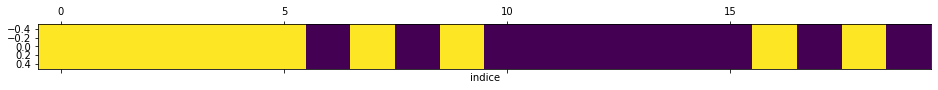

In [ ]:
import matplotlib.pyplot as plt
mask = select.get_support()
print([a for a in zip(X.columns,mask)])
plt.matshow(mask.reshape(1, -1))
plt.xlabel("indice")
plt.show()

In [ ]:
mask.reshape(1,-1)

array([[ True,  True,  True,  True,  True,  True, False,  True, False,
         True, False, False, False, False, False, False,  True, False,
         True, False]])

Al haber limpiado el ruido, éstos datos deberían ser mejor para generar un modelo que usar todas las columnas disponibles.

Hagámos un experimento: 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

select = SelectPercentile(score_func=f_regression,percentile=50)
select.fit(X_train, y_train)
X_sel = select.transform(X_train)

In [ ]:
X_train

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peakrpm,city-L/100km,0,1,2,3,4,5,6,7,8,9
92,97.2,0.833253,0.905556,54.7,3.33,3.47,8.5,97.0,5200.0,8.703704,1.073632,-1.026515,0.132970,-0.700121,1.195047,-1.523187,-0.558922,0.377212,1.565524,-0.065750
185,104.3,0.907256,0.933333,56.2,3.78,3.15,9.5,114.0,5400.0,10.217391,-0.646227,1.775311,-1.193637,0.919154,1.000582,-0.670620,1.392465,-0.250047,0.288694,0.260322
24,93.7,0.755887,0.886111,50.6,2.97,3.23,9.4,68.0,5500.0,7.580645,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982
30,86.6,0.694858,0.887500,50.8,2.91,3.41,9.2,76.0,6000.0,7.580645,-0.828995,-0.560181,0.747294,0.610370,-0.020902,0.117327,1.277665,-0.591571,0.547097,-0.202193
109,108.0,0.897165,0.948611,56.0,3.61,3.21,7.0,142.0,5600.0,13.055556,-0.071601,-0.037222,0.727630,0.051946,0.732640,-0.080717,0.078635,-1.998201,0.916328,0.346488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,102.7,0.857280,0.944444,54.8,3.78,3.12,8.0,175.0,5000.0,12.368421,1.246085,-2.073390,-0.342688,-0.371441,-1.407512,-0.777817,-1.110576,1.752270,0.935678,1.271555
192,109.1,0.907256,0.955556,55.5,3.78,3.15,8.7,160.0,5300.0,12.368421,-1.979300,0.747910,-1.072743,0.239247,2.074083,-0.919385,-2.530288,-0.286004,1.100960,1.958347
117,94.5,0.811629,0.948611,50.2,3.94,3.11,9.5,143.0,5500.0,12.368421,0.758929,0.281191,0.104201,-0.062593,-0.753965,-0.280675,-1.692957,-0.098340,-0.988591,-1.103589
47,93.1,0.764536,0.891667,54.1,3.03,3.15,9.0,68.0,5000.0,7.580645,-0.275052,-2.301921,-1.515191,1.366874,1.644968,-0.249036,0.576557,0.311250,3.078881,1.119575


In [ ]:
X_test

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peakrpm,city-L/100km,0,1,2,3,4,5,6,7,8,9
83,94.5,0.794330,0.886111,54.5,3.15,3.29,9.40,69.000000,5200.000000,7.580645,-1.344451,-0.918652,-1.004141,-0.767798,-0.034685,0.234215,1.550500,-0.998354,0.984322,-0.213989
12,101.2,0.849592,0.900000,54.3,3.31,3.19,9.00,121.000000,4250.000000,11.190476,0.791032,-0.909387,1.402794,-1.401851,0.586857,2.190456,-0.990536,-0.566298,0.099651,-0.503476
33,93.7,0.720807,0.888889,52.6,2.91,3.41,9.20,76.000000,6000.000000,7.833333,-0.012247,-0.897254,0.075805,-0.677162,0.975120,-0.147057,-0.825497,-0.321386,0.412931,-0.563725
113,93.7,0.803940,0.886111,50.8,2.97,3.23,9.40,68.000000,5500.000000,7.580645,0.321357,0.421921,1.613711,0.453534,-0.244157,0.964087,1.189470,-1.227608,0.597400,0.701173
171,104.5,0.902451,0.923611,54.1,3.27,3.35,9.20,156.000000,5200.000000,11.750000,1.107081,-0.120381,-2.172670,0.847422,-0.535328,-0.090533,0.331980,0.190500,0.709452,-0.435486
134,97.2,0.826526,0.908333,52.5,3.62,2.64,9.00,94.000000,5200.000000,9.038462,0.160574,0.003046,0.436938,1.190646,0.949554,-1.484898,-2.553921,0.934320,-1.366879,-0.224765
163,98.4,0.846708,0.911111,53.0,3.62,3.50,9.30,116.000000,4800.000000,9.791667,0.484733,-0.846357,-0.643550,1.029961,-0.334775,-0.403648,-0.955123,0.423599,2.062525,-1.067533
124,99.1,0.896684,0.923611,56.1,3.54,3.07,9.30,110.000000,5250.000000,11.190476,-0.379128,-0.203580,-0.581681,-1.014757,-0.649278,-1.223940,0.034083,-0.769973,0.233786,-1.555896
74,95.9,0.832292,0.920833,50.2,3.58,3.86,7.00,145.000000,5000.000000,12.368421,-1.840874,-1.279577,-0.624819,0.026091,0.517659,-0.725744,0.186767,-0.755383,-0.611518,-1.406661
18,94.5,0.749159,0.883333,52.0,3.03,3.11,9.60,70.000000,5400.000000,6.184211,0.625667,-0.857158,-1.070892,0.482472,-0.223463,0.714000,0.473238,-0.072829,-0.846794,-1.514847


In [ ]:
y_train

92      9549.0
185    12940.0
24      6692.0
30      6855.0
109    18150.0
        ...   
67     16503.0
192    19045.0
117    22018.0
47      6095.0
172    15750.0
Name: price, Length: 147, dtype: float64

In [ ]:
y_test

83      6649.0
12     21105.0
33      7129.0
113     6692.0
171    15690.0
134     9960.0
163    17669.0
124    12170.0
74     12629.0
18      6295.0
7      18920.0
5      15250.0
125    15040.0
161    11199.0
170    15998.0
181     9980.0
123    11850.0
60     28248.0
44     32250.0
141     5348.0
56     11245.0
173     7775.0
136    11259.0
89      7999.0
63     34184.0
55     10795.0
110     5572.0
166     9988.0
175     7995.0
45     35550.0
22      7957.0
155     8238.0
66     45400.0
37      9095.0
4      17450.0
80      9279.0
178     9495.0
106    17075.0
160     9989.0
26      8558.0
139     8013.0
143     6488.0
71      7689.0
8      23875.0
61     28176.0
130     7053.0
122     9895.0
101    12440.0
118    32528.0
Name: price, dtype: float64

In [ ]:
X_test_sel = select.transform(X_test)
lr = LinearRegression()
lr_red = LinearRegression()
lr.fit(X_train, y_train)
lr_red.fit(X_sel, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Precisión con todas las columnas: %.2f" %lr.score(X_test, y_test))
print("Precisión con las seleccionadas: %.2f" %lr_red.score(X_test_sel, y_test))

Precisión con todas las columnas: 0.81
Precisión con las seleccionadas: 0.83


Como vemos, en éste ejemplo sencillo de regresión lineal, la elimininación de ruido nos aumenta la precisión en un 2%

# Ejercicio

Para un conjunto de jugadores de la NBA, se desea evaluar si existe relación entre algunas variables asociadas a los jugadores. 

El dataset de la NBA ('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv') contiene información de los jugadores, como su nombre, equipo, posición, edad, altura (pies-pulgadas), peso (libras) y salario anual.


## Pregunta 1

Cargar e inspeccionar el dataset

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
import pandas as pd
import numpy as np

# Cargando el dataset
dfNBA=pd.read_csv('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv')

#Inspeccionando el dataset
dfNBA.head()

dfNBA.columns

dfNBA.shape


--->

In [ ]:
# Cargando el dataset
dfNBA=pd.read_csv('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv')

#Inspeccionando el dataset
dfNBA.head()

dfNBA.columns

dfNBA.shape

(458, 9)

In [ ]:
dfNBA.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


## Pregunta 2

Eliminar las filas que tengan el salario nulo y la columna number, ya que esta no tiene ninguna relevancia

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
#Búsqueda de valores nulos
dfNBA.isnull().sum()

#Eliminando valores nulos
dfNBA.dropna(subset=['Salary'], inplace=True)
dfNBA.reset_index(drop=True, inplace=True)

#Eliminado columna Number
dfNBA.drop('Number', axis=1, inplace=True)
--->

##Pregunta 3

Convertir la estatura de pies-pulgadas a centímetros.

1 pie=30.48cm
1 pulgada=2.54

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
#funcion para convertir de pies-pulgadas a centímetros
def conversion(a):
  pie,pulg=a.split("-")
  cms=int(pie)*30.48+int(pulg)*2.54
  return cms

#Convirtiendo la columna Height 
dfNBA['Height']=dfNBA['Height'].apply(conversion)
--->

## Pregunta 4

Construir un diagrama de barras con las cinco universidades con mas jugadores en la NBA

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

dfNBA['College'].value_counts().head().plot(kind='bar')

--->


## Pregunta 5

Construir un boxplot en el que se muestre los salarios vs las posiciones de los jugadores. Esto permite entender si los salarios varian significativamente dependiendo de la posición.

Las posibles posiciones son

* PG: point guard
* SG:shooting guard 
* SF: small forward 
* PF: power forward 
* C: center

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4.5, 4.5))
sns.boxplot(x="Position",y="Salary", data=dfNBA)

--->

## Pregunta 6

Obtener los cinco equipos que pagan los salarios mas altos (sumando toda la nómina de sus jugadores)

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

dfNBA.groupby(by='Team').Salary.sum().sort_values(ascending=False).head()

--->

## Pregunta 7

Construir una tabla pivot que muestre el salario promedio de los jugadores por equipo y posición para para los cinco equipos que pagan mejores salarios. Construir una representación visual de la información anterior usando heatmap. 

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

#Lista de los 5 equipos que pagan mayores salarios
topTeams=list(dfNBA.groupby(by='Team').Salary.sum().sort_values(ascending=False).head().index)

#Seleción del dataset de los 5 equipos que pagan mayores salarios
dfTop=dfNBA[dfNBA['Team'].isin(topTeams)]

#Construcción de tabla pivot 
pivotNBA=dfTop.pivot_table('Salary', index='Position',columns='Team')

#Construcción heatmap
fig, ax = plt.subplots()
im = ax.pcolor(pivotNBA, cmap='gist_rainbow')

#label names
row_labels = pivotNBA.columns
col_labels = pivotNBA.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivotNBA.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivotNBA.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()
--->

## Pregunta 8

Utilizar el método `scatter_matrix` para visualizar si existe algún tipo de correlación entre las variables numérocas del dataset

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from pandas.plotting import scatter_matrix

scatter_matrix(dfNBA, figsize=(12, 8))
plt.show()

--->

## Pregunta 9

Corroborar los resultados anteriores calculando los coeficientes de correlación de Pearson para las variables numéricas del dataset

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

dfNBA.corr(method ='pearson') 

--->

## Pregunta 10

Usar el método `pairplot` para evaluar visualizar si existe dependencia entre algunas de las variables numéricas y la posición de los jugadores.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

sns.pairplot(dfNBA, hue = "Position")

--->